In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
import sklearn.metrics as metrics
from sklearn.metrics import r2_score
from sklearn.compose import ColumnTransformer

# from random import gauss
# from mpl_toolkits.mplot3d import Axes3D

from statsmodels.formula.api import ols
import statsmodels.api as sm

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
# Shows *all* columns in dataframe, i.e. does not truncate horizontally
pd.set_option('display.max_columns', None)

# Converts from scientific notation to standard form (applied to every df in
# this notebook) and rounds to two decimal places
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
df = pd.read_csv('./data/kc_house_data.csv')

# Listing out column names
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [4]:
# Converting column `date` to datetime64[ns] from type string/object
df['date'] = df['date'].astype('datetime64[ns]')

In [5]:
df_copy = df.copy()

In [6]:
df_copy['id'].value_counts()

795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [7]:
df_copy = df_copy.sort_values(by=['id', 'date'])
df_copy = df_copy.drop_duplicates(subset=['id'], keep='last')

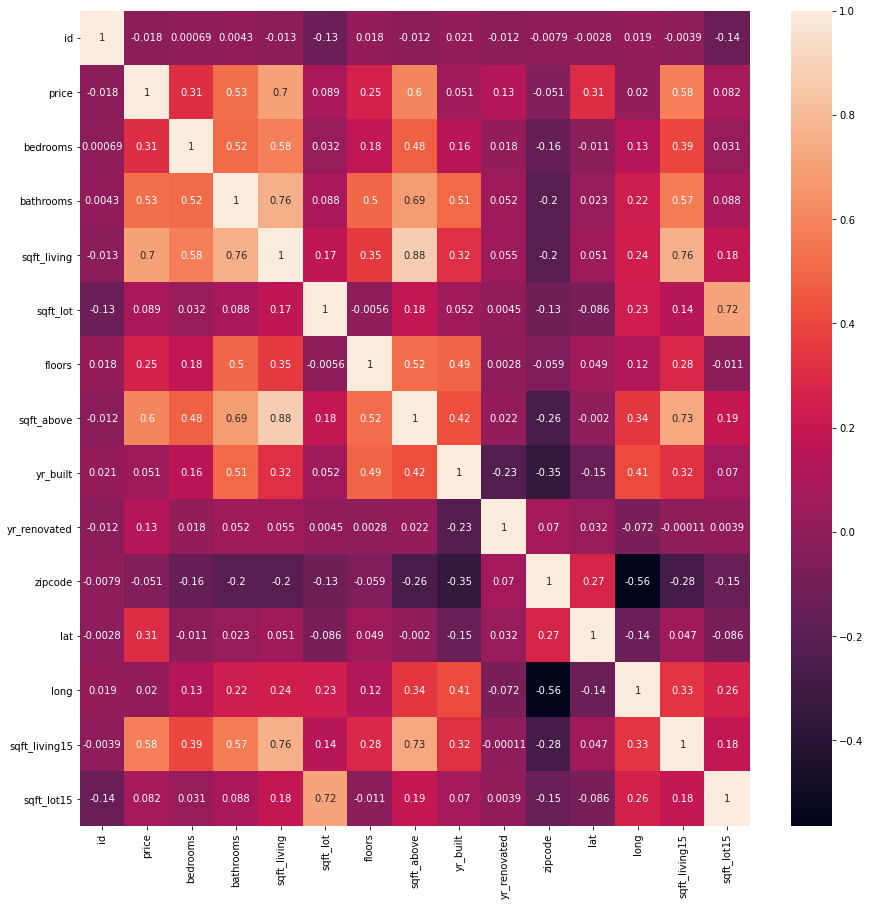

In [8]:
#looking at correlations
fig, ax = plt.subplots(figsize=(15,15))
heat = sns.heatmap(df_copy.corr(), annot = True)

In [9]:
df_copy.groupby('view').mean()

df_copy.sort_values('price', ascending = False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,2014-10-13,7700000.00,6,8.00,12050,27600,2.50,NO,GOOD,Good,13 Mansion,8570,3480.0,1910,1987.00,98102,47.63,-122.32,3940,8800
3910,9808700762,2014-06-11,7060000.00,5,4.50,10040,37325,2.00,YES,AVERAGE,Average,11 Excellent,7680,2360.0,1940,2001.00,98004,47.65,-122.21,3930,25449
9245,9208900037,2014-09-19,6890000.00,6,7.75,9890,31374,2.00,NO,EXCELLENT,Average,13 Mansion,8860,1030.0,2001,0.00,98039,47.63,-122.24,4540,42730
4407,2470100110,2014-08-04,5570000.00,5,5.75,9200,35069,2.00,NO,NONE,Average,13 Mansion,6200,3000.0,2001,nan,98039,47.63,-122.23,3560,24345
1446,8907500070,2015-04-13,5350000.00,5,5.00,8000,23985,2.00,NO,EXCELLENT,Average,12 Luxury,6720,1280.0,2009,0.00,98004,47.62,-122.22,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18453,7999600180,2014-05-29,83000.00,2,1.00,900,8580,1.00,NO,NONE,Average,5 Fair,900,0.0,1918,0.00,98168,47.47,-122.27,2060,6533
2139,1623049041,2014-05-08,82500.00,2,1.00,520,22334,1.00,NO,NONE,Fair,5 Fair,520,0.0,1951,0.00,98168,47.48,-122.30,1572,10570
16184,3028200080,2015-03-24,81000.00,2,1.00,730,9975,1.00,NaN,NONE,Poor,5 Fair,730,0.0,1943,0.00,98168,47.48,-122.31,860,9000
465,8658300340,2014-05-23,80000.00,1,0.75,430,5050,1.00,NaN,NONE,Fair,4 Low,430,0.0,1912,0.00,98014,47.65,-121.91,1200,7500


In [10]:
# Dropping irrelevant columns
df_copy.drop(columns = ['id', 'floors', 'waterfront', 'date',
                        'lat', 'long', 'condition', 'yr_renovated',
                         'sqft_lot15','sqft_above', 'sqft_living15',
                         'sqft_basement', 'zipcode', 'yr_built'],
                        inplace=True)

In [11]:
df_copy.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade
2495,300000.00,6,3.00,2400,9373,NONE,7 Average
6729,647500.00,4,1.75,2060,26036,NONE,8 Good
8404,400000.00,3,1.00,1460,43000,NONE,7 Average
8800,235000.00,3,1.00,1430,7599,NONE,6 Low Average
3553,402500.00,4,2.00,1650,3504,NONE,7 Average


In [12]:
df_copy.grade = [x.replace(" ", "_").strip() for x in df_copy.grade]

In [13]:
#previous run showed a fan like residual shape and that there's a pattern so we are transform
df_copy['sqft_living'] = np.log(df_copy['sqft_living'])

In [14]:
# Establishing target and predictor variables
df_copy = df_copy[df_copy['grade'] != '3 Poor']

In [15]:
df_copy.bedrooms = df_copy.bedrooms.astype(str)

In [16]:
df_copy.bathrooms  = df_copy.bathrooms.astype(str)

In [17]:
#df_copy.zipcode = df_copy.zipcode.astype(str)

In [18]:
df_copy = df_copy.dropna(subset = ['view'])

In [19]:
X = df_copy.drop(columns = 'price')

In [20]:
y = df_copy.price

In [21]:
# Creating variables for train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
train_df = pd.concat([X_train, y_train], axis=1)

test_df = pd.concat([X_test, y_test], axis=1)

In [23]:
# Did it split correctly?
len(X_train + X_test) == len(X)

True

In [24]:
simple_model = sm.OLS(y_train, sm.add_constant(X_train['sqft_living'])).fit()

In [25]:
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     8351.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:42:05   Log-Likelihood:            -2.0061e+05
No. Observations:               14309   AIC:                         4.012e+05
Df Residuals:                   14307   BIC:                         4.012e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -3.479e+06   4.41e+04    -78.933      0.000   -3.57e+06   -3.39e+06
sqft_living  5.326e+05   5827.808     91.383      0.000    5.21e+05    5.44e+05
==============================================================================
Omnibus:                    13647.815   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1482077.489
Skew:                           4.313   Prob(JB):                         0.00
Kurtosis:                      52.106   Cond. No.                         137.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# Get our predictions!
simple_train_preds = simple_model.predict(sm.add_constant(X_train['sqft_living']))
simple_train_preds

15502   436164.84
7198    766368.44
7083    538359.29
21100   425823.45
2405    953374.63
           ...   
17577   363096.32
5228    436164.84
10941   363096.32
4776    269121.79
10505   418815.91
Length: 14309, dtype: float64

In [27]:
# Can now predict for our test set!
simple_test_preds = simple_model.predict(sm.add_constant(X_test['sqft_living']))
simple_test_preds

14835   408128.63
1967     80502.26
16157   667799.18
18910   377010.28
17328   355206.33
           ...   
1625    851080.74
16061   119017.72
5867    626458.73
1592    456264.02
10418   670004.42
Length: 7048, dtype: float64

In [28]:
####THIS IS THE SKLEARN WAY OF GETTING THE R2 COMPARED TO STATSMODEL WHERE IT GIVES US IN THE SUMMARY
r2_score(y_test,simple_test_preds)

0.38609981111803227

In [29]:
r2_score(y_train,simple_train_preds) #SAME AS THE R-SQUARED IN THE SUMMARY ABOVE FOR TRAIN

0.36856545314832845

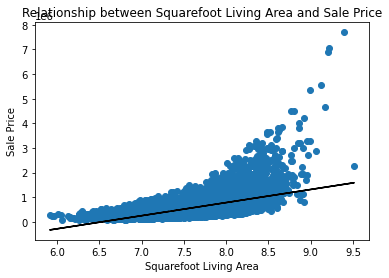

In [30]:
# Just looking at two variables

# Plot our points, rating vs balance, as a scatterplot
plt.scatter(train_df['sqft_living'], train_df['price'])

# Plot the line of best fit!
plt.plot(train_df['sqft_living'], simple_train_preds, color='black')

plt.ylabel('Sale Price')
plt.xlabel('Squarefoot Living Area')
plt.title('Relationship between Squarefoot Living Area and Sale Price')
plt.show()

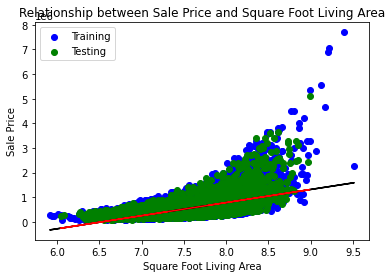

In [31]:
#THIS IS TESTING 
# One last thing - can visualize both train and test set!

# Plot our training data
plt.scatter(train_df['sqft_living'], train_df['price'], color='blue', label='Training')
# Plot our testing data
plt.scatter(test_df['sqft_living'], test_df['price'], color='green', label='Testing')


# Plot the line of best fit
plt.plot(train_df['sqft_living'], simple_train_preds, color='black')
# Plotting for the test data just to show it's the same!
plt.plot(test_df['sqft_living'], simple_test_preds, color='red')

plt.ylabel('Sale Price')
plt.xlabel('Square Foot Living Area')
plt.title('Relationship between Sale Price and Square Foot Living Area')
plt.legend()
plt.show()

# Statistical Analysis on Train_DF

In [32]:
summary_of_view = df_copy.groupby('view').agg(['mean', 'std'])

summary_of_view

price           sqft_living      sqft_lot          
                mean       std        mean  std     mean       std
view                                                              
AVERAGE    791956.68 510351.93        7.79 0.43 22331.72  60261.29
EXCELLENT 1454416.19 934214.96        8.02 0.44 21762.46  35989.90
FAIR       814386.56 513226.70        7.77 0.42 12342.66  17078.17
GOOD       972849.27 615076.79        7.94 0.39 35010.67 109236.86
NONE       498336.32 287341.26        7.52 0.41 14178.46  37109.10

In [33]:
# Figure out how to do this in a loop/function?
df_average = train_df[train_df['view'] == 'AVERAGE']
df_excellent = train_df[train_df['view'] == 'EXCELLENT']
df_fair = train_df[train_df['view'] == 'FAIR']
df_good = train_df[train_df['view'] == 'GOOD']
df_none = train_df[train_df['view'] == 'NONE']

In [34]:
train_df['view'].value_counts()

NONE         12906
AVERAGE        636
GOOD           342
FAIR           213
EXCELLENT      212
Name: view, dtype: int64

In [35]:
fvalue, pvalue = stats.f_oneway(df_average['price'], df_excellent['price'], df_fair['price'],
                                df_good['price'] , df_none['price'])

In [36]:
train_df.grade.value_counts()

7_Average        5939
8_Good           4008
9_Better         1756
6_Low_Average    1353
10_Very_Good      730
11_Excellent      268
5_Fair            169
12_Luxury          60
4_Low              17
13_Mansion          8
3_Poor              1
Name: grade, dtype: int64

In [37]:
# Dropping poor row, since there is only one
df3 = train_df.copy()

In [38]:
df3.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,view,grade,price
15502,2,1.0,7.35,5000,FAIR,7_Average,724000.00
7198,4,2.25,7.97,9680,NONE,7_Average,630000.00
7083,3,3.5,7.54,1710,NONE,8_Good,587206.00
21100,3,3.0,7.33,1568,NONE,8_Good,474950.00
2405,4,3.5,8.32,7304,NONE,11_Excellent,968933.00


In [39]:
df3['grade'].value_counts()

7_Average        5939
8_Good           4008
9_Better         1756
6_Low_Average    1353
10_Very_Good      730
11_Excellent      268
5_Fair            169
12_Luxury          60
4_Low              17
13_Mansion          8
3_Poor              1
Name: grade, dtype: int64

In [40]:
# Might need a for loop or a function here
df_10 = train_df[train_df['grade'] == '10_Very_Good']
df_11 = train_df[train_df['grade'] == '11_Excellent']
df_12 = train_df[train_df['grade'] == '12_Luxury']
df_4 = train_df[train_df['grade'] == '4_Low']
df_5 = train_df[train_df['grade'] == '5_Fair']
df_6 = train_df[train_df['grade'] == '6_Low_Average']
df_7 = train_df[train_df['grade'] == '7_Average']
df_8 = train_df[train_df['grade'] == '8_Good']
df_9 = train_df[train_df['grade'] == '9_Better']

In [41]:
# Finding f-statistic and p-value using ANOVA testing

f_value_grade, p_value_grade = stats.f_oneway(df_10['price'], df_11['price'], df_12['price'],
                                              df_4['price'], df_5['price'], df_6['price'],
                                              df_7['price'], df_8['price'], df_9['price'])
p_value_grade

0.0

In [42]:
# Ad-hoc test to determine differeces in price vs. grade

df_grade = train_df[['grade', 'price']]

print(pairwise_tukeyhsd(df_grade['price'], df_grade['grade']))

                Multiple Comparison of Means - Tukey HSD, FWER=0.05                
    group1        group2       meandiff   p-adj      lower         upper     reject
-----------------------------------------------------------------------------------
 10_Very_Good  11_Excellent   440042.4573  0.001   381228.9869   498855.9277   True
 10_Very_Good     12_Luxury  1204100.0269  0.001  1093509.7735  1314690.2803   True
 10_Very_Good    13_Mansion  3538683.3603  0.001  3245956.8063  3831409.9142   True
 10_Very_Good        3_Poor  -803066.6397 0.0641 -1627086.3902    20953.1107  False
 10_Very_Good         4_Low  -845890.1691  0.001 -1047919.6617  -643860.6766   True
 10_Very_Good        5_Fair  -810395.1841  0.001  -880688.7259  -740101.6423   True
 10_Very_Good 6_Low_Average  -758254.2214  0.001  -796070.1413  -720438.3015   True
 10_Very_Good     7_Average  -660967.1238  0.001  -693263.4133  -628670.8344   True
 10_Very_Good        8_Good  -522009.7742  0.001  -555146.7297  -488872.8187

In [43]:
df3.view.value_counts()

NONE         12906
AVERAGE        636
GOOD           342
FAIR           213
EXCELLENT      212
Name: view, dtype: int64

In [44]:
df_copy.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'view',
       'grade'],
      dtype='object')

In [45]:
#len(df_copy.zipcode.unique())

Dropping the view_Fair because it's not different in term of mean price compared to average, dropping low in grade because it's not significant to some other grades but significant to others.

In [46]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14309 entries, 15502 to 10505
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     14309 non-null  object 
 1   bathrooms    14309 non-null  object 
 2   sqft_living  14309 non-null  float64
 3   sqft_lot     14309 non-null  int64  
 4   view         14309 non-null  object 
 5   grade        14309 non-null  object 
 6   price        14309 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 894.3+ KB


# OHE AND SCALING TRAIN AND TEST

In [47]:
scaler = StandardScaler()

#calling to certain columns
continous = [c for c in df3.columns if (df3[c].dtype == 'int64')| (df3[c].dtype == 'float64')]

ct = ColumnTransformer(transformers=[('scale', scaler, continous)],
                       remainder='passthrough')
ct.fit(df3)

# Transform training data

X_train_scaled = ct.transform(df3)
X_train_scaled

# Scaling  testing data
X_test_scaled = ct.transform(test_df)
X_test_scaled

array([[-0.5921231578671874, -0.32166175990046286, -0.32770369181478753,
        ..., '2.5', 'NONE', '7_Average'],
       [-2.036443093919441, -0.23687540022858833, -0.27685316330750914,
        ..., '1.0', 'NONE', '7_Average'],
       [0.5526178760713537, -0.24914681117010862, 1.1175218552341775,
        ..., '2.25', 'AVERAGE', '9_Better'],
       ...,
       [0.370371149334053, -0.08382363598573785, 0.294412379317679, ...,
        '2.25', 'NONE', '8_Good'],
       [-0.37992135472846783, -0.25732775179778883, -0.11359620336308902,
        ..., '1.75', 'NONE', '7_Average'],
       [0.5623395422133854, -0.16542851874684789, 0.2610919014273834,
        ..., '2.5', 'NONE', '10_Very_Good']], dtype=object)

In [48]:
scaled_df = pd.DataFrame(X_train_scaled, columns = ct.get_feature_names_out())
X_test_scale = pd.DataFrame(X_test_scaled, columns = ct.get_feature_names_out())

In [49]:
scaled_df

,scale__sqft_living,scale__sqft_lot,scale__price,remainder__bedrooms,remainder__bathrooms,remainder__view,remainder__grade
0,-0.47,-0.24,0.49,2,1.0,FAIR,7_Average
1,0.99,-0.13,0.23,4,2.25,NONE,7_Average
2,-0.02,-0.31,0.12,3,3.5,NONE,8_Good
3,-0.51,-0.32,-0.18,3,3.0,NONE,8_Good
4,1.81,-0.19,1.14,4,3.5,NONE,11_Excellent
...,...,...,...,...,...,...,...
14304,-0.79,-0.15,-0.50,3,1.0,NONE,7_Average
14305,-0.47,-0.14,0.01,3,2.5,NONE,7_Average
14306,-0.79,-0.13,-0.70,2,1.75,NONE,6_Low_Average
14307,-1.20,-0.16,-0.62,3,1.75,NONE,7_Average


In [50]:
scaled_df.columns = [x.replace('scale__', "").replace('remainder__','').strip() for x in scaled_df.columns]
X_test_scale.columns = [x.replace('scale__', "").replace('remainder__','').strip() for x in scaled_df.columns]

In [51]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14309 entries, 0 to 14308
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   sqft_living  14309 non-null  object
 1   sqft_lot     14309 non-null  object
 2   price        14309 non-null  object
 3   bedrooms     14309 non-null  object
 4   bathrooms    14309 non-null  object
 5   view         14309 non-null  object
 6   grade        14309 non-null  object
dtypes: object(7)
memory usage: 782.6+ KB


In [52]:
#Convert to a function or loop
X_test_scale.sqft_living = X_test_scale.sqft_living.astype(float)
X_test_scale.sqft_lot = X_test_scale.sqft_lot.astype(float)
X_test_scale.price = X_test_scale.price.astype(float)

scaled_df.sqft_living = scaled_df.sqft_living.astype(float)
scaled_df.sqft_lot = scaled_df.sqft_lot.astype(float)
scaled_df.price = scaled_df.price.astype(float)

In [53]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14309 entries, 0 to 14308
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sqft_living  14309 non-null  float64
 1   sqft_lot     14309 non-null  float64
 2   price        14309 non-null  float64
 3   bedrooms     14309 non-null  object 
 4   bathrooms    14309 non-null  object 
 5   view         14309 non-null  object 
 6   grade        14309 non-null  object 
dtypes: float64(3), object(4)
memory usage: 782.6+ KB


In [54]:
cat_cols = [c for c in scaled_df.columns if scaled_df[c].dtype == 'O']

encoder = OneHotEncoder(drop='if_binary', handle_unknown='ignore')

# Create an columntransformer object.
# This will help us to merge transformed columns
# with the rest of the dataset.

ct2 = ColumnTransformer(transformers=[('ohe', encoder, cat_cols)],
                       remainder='passthrough')
ct2.fit(scaled_df)
X_train_enc = ct2.transform(scaled_df)
X_train_enc

#OHE testing
X_test_enc = ct2.transform(X_test_scale)
X_test_enc

C:\Users\xiaoh\anaconda3\envs\learn-env\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


<7048x59 sparse matrix of type '<class 'numpy.float64'>'
	with 49335 stored elements in Compressed Sparse Row format>

In [55]:
scaled_p_df = pd.DataFrame(X_train_enc.todense() ,columns= ct2.get_feature_names_out(), index = y_train.index)
scaled_test_df= pd.DataFrame(X_test_enc.todense(), columns= ct2.get_feature_names_out(), index = y_test.index)

In [56]:
scaled_p_df.columns = [x.replace("ohe__", "").replace('remainder__','').strip() for x in scaled_p_df.columns]
scaled_test_df.columns = [x.replace("ohe__", "").replace('remainder__','').strip() for x in scaled_test_df.columns]

In [57]:
scaled_p_df.head()

,bedrooms_1,bedrooms_10,bedrooms_2,bedrooms_3,bedrooms_33,bedrooms_4,bedrooms_5,bedrooms_6,bedrooms_7,bedrooms_8,bedrooms_9,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,bathrooms_5.0,bathrooms_5.25,bathrooms_5.5,bathrooms_5.75,bathrooms_6.0,bathrooms_6.25,bathrooms_6.5,bathrooms_6.75,bathrooms_7.5,bathrooms_7.75,bathrooms_8.0,view_AVERAGE,view_EXCELLENT,view_FAIR,view_GOOD,view_NONE,grade_10_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_3_Poor,grade_4_Low,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,sqft_living,sqft_lot,price
15502,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-0.47,-0.24,0.49
7198,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.99,-0.13,0.23
7083,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-0.02,-0.31,0.12
21100,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-0.51,-0.32,-0.18
2405,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.81,-0.19,1.14


In [58]:
scaled_p_df.drop(columns = ['view_FAIR', 'grade_4_Low'], inplace = True)
scaled_test_df.drop(columns = ['view_FAIR', 'grade_4_Low'], inplace = True)

# No clue but it's only on training data/ Assumption testing?

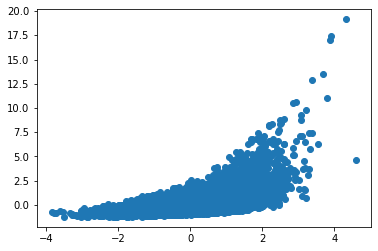

In [59]:
fig, ax = plt.subplots()

x = scaled_p_df['sqft_living']
y = scaled_p_df['price']


ax.scatter(x, y);

In [60]:
np.corrcoef(df['sqft_living'],df['price'])

array([[1.       , 0.7019173],
       [0.7019173, 1.       ]])

In [61]:
# Baseline model
# Import necessary package
from sklearn.dummy import DummyRegressor

# Instantiate
dummy_lr = DummyRegressor()

# Create variables
X = scaled_p_df['sqft_living']
y = scaled_p_df['price']

# Fit
dummy_lr.fit(X,y)

# Score
dummy_lr.score(X,y)

0.0

In [62]:
#Define X and y variable using scaled & parse dataframe

X_s_p = scaled_p_df[['sqft_living']]
y_s_p = scaled_p_df[['price']]

In [63]:
sk_lr = LinearRegression()
sk_lr.fit(X_s_p, y_s_p)
preds = sk_lr.predict(y_s_p)

preds

C:\Users\xiaoh\anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- price
Feature names seen at fit time, yet now missing:
- sqft_living

  warnings.warn(message, FutureWarning)


array([[ 0.2949908 ],
       [ 0.14225985],
       [ 0.07272828],
       ...,
       [-0.42658167],
       [-0.37767527],
       [-0.37280088]])

In [64]:
X = scaled_p_df['sqft_living']
y = scaled_p_df[['price']]

In [65]:
X = scaled_p_df['sqft_living']
y = scaled_p_df[['price']]


In [66]:
X = scaled_p_df['sqft_living']
y = scaled_p_df[['price']]
resids = y - preds
resids

,price
15502,0.19
7198,0.09
7083,0.05
21100,-0.07
2405,0.45
...,...
17577,-0.20
5228,0.00
10941,-0.28
4776,-0.24


In [67]:
#Create out bins

bins = int( len(X)**.5)
bins

119

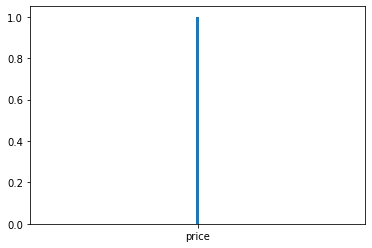

In [68]:
# FIX THIS GRAPH
#Histogram of residuals

plt.hist(resids, bins=bins);

In [69]:
print(resids.max())
resids.min()

price   7.53
dtype: float64


price   -0.49
dtype: float64

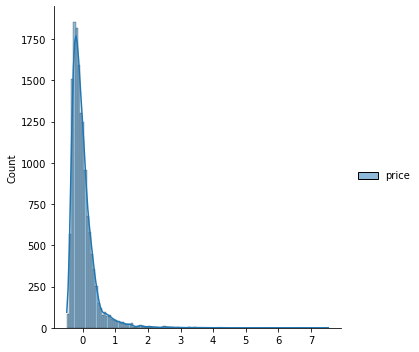

In [70]:
sns.displot(resids, bins=bins, kde=True)

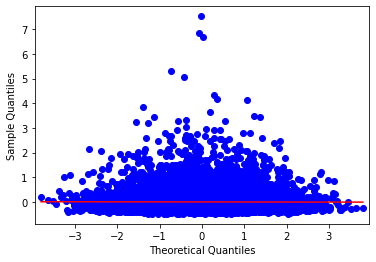

In [71]:
sm.qqplot(resids, line='r');

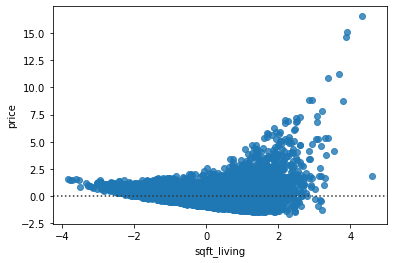

In [72]:
# resid plot sns.resid

sns.residplot(x=X, y=y);

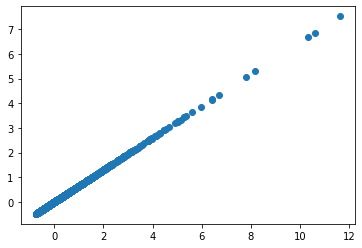

In [73]:
plt.scatter(preds, resids);

In [74]:
#Fit the dummy_regressor

dummy_lr.fit(X_s_p,y_s_p)

DummyRegressor()

In [75]:
# Score it

dummy_lr.score(X_s_p,y_s_p)

0.0

# Train df Modeling

In [76]:
# Creating a straightforward, initial model --
# just for kicks
simple_formula = 'price ~ sqft_living'
simple_models = ols(formula = simple_formula,
                   data = scaled_p_df).fit()
simple_mod_summ = simple_models.summary()

simple_mod_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.369
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     8351.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:42:13   Log-Likelihood:                -17014.
No. Observations:               14309   AIC:                         3.403e+04
Df Residuals:                   14307   BIC:                         3.405e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -8.686e-17      0.007  -1.31e-14      1.000      -0.013       0.013
sqft_living     0.6071      0.007     91.383      0.000       0.594       0.620
==============================================================================
Omnibus:                    13647.815   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1482077.489
Skew:                           4.313   Prob(JB):                         0.00
Kurtosis:                      52.106   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

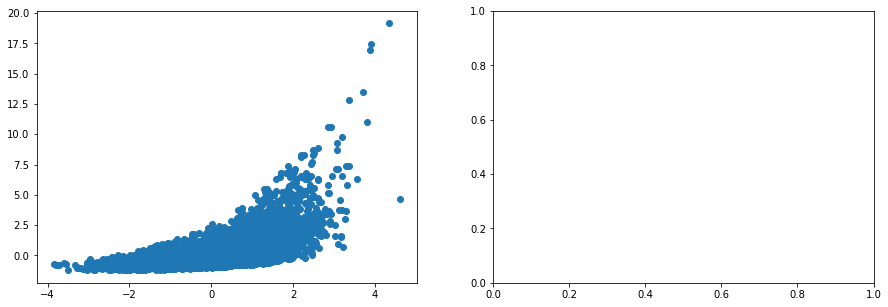

In [77]:
fig, ax = plt.subplots(ncols=2,figsize=(15,5))

x1 = scaled_p_df[['sqft_living']]
y1 = scaled_p_df[['price']]

# x2 = scaled_and_parse_df[['bedrooms']]

ax[0].scatter(x1, y1)
# ax[1].scatter(x2,y1);

In [78]:
simple_formula4 = 'price ~ sqft_living + view_GOOD + view_NONE + grade_11_Excellent + grade_12_Luxury + grade_13_Mansion + grade_5_Fair + grade_6_Low_Average + grade_7_Average + grade_8_Good+ grade_9_Better'          

simple_model4 = ols(formula = simple_formula4,
                   data = scaled_p_df).fit()

simple_mod_summ4 = simple_model4.summary()

simple_mod_summ4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     1891.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:42:14   Log-Likelihood:                -13878.
No. Observations:               14309   AIC:                         2.778e+04
Df Residuals:                   14297   BIC:                         2.787e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.4451      0.031     45.955      0.000       1.383       1.507
sqft_living             0.2741      0.008     34.639      0.000       0.259       0.290
view_GOOD              -0.0734      0.040     -1.846      0.065      -0.151       0.005
view_NONE              -0.5791      0.021    -27.645      0.000      -0.620      -0.538
grade_11_Excellent      0.9591      0.046     20.931      0.000       0.869       1.049
grade_12_Luxury         2.8013      0.086     32.468      0.000       2.632       2.970
grade_13_Mansion        8.6522      0.228     37.996      0.000       8.206       9.099
grade_5_Fair           -1.2025      0.059    -20.302      0.000      -1.319      -1.086
grade_6_Low_Average    -1.1872      0.035    -33.777      0.000      -1.256      -1.118
grade_7_Average        -1.1581      0.028    -41.198      0.000      -1.213      -1.103
grade_8_Good           -0.9928      0.027    -37.112      0.000      -1.045      -0.940
grade_9_Better         -0.5730      0.028    -20.428      0.000      -0.628      -0.518
==============================================================================
Omnibus:                    10091.846   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           571469.539
Skew:                           2.789   Prob(JB):                         0.00
Kurtosis:                      33.453   Cond. No.                         62.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
simple_formula4 = 'price ~  view_GOOD + view_NONE + grade_11_Excellent + grade_12_Luxury + grade_13_Mansion + grade_5_Fair + grade_6_Low_Average + grade_7_Average + grade_8_Good+ grade_9_Better'          

simple_model4 = ols(formula = simple_formula4,
                   data = scaled_p_df).fit()

simple_mod_summ4 = simple_model4.summary()

simple_mod_summ4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     1809.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:42:14   Log-Likelihood:                -14455.
No. Observations:               14309   AIC:                         2.893e+04
Df Residuals:                   14298   BIC:                         2.901e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.8464      0.030     60.669      0.000       1.787       1.906
view_GOOD              -0.0579      0.041     -1.399      0.162      -0.139       0.023
view_NONE              -0.6444      0.022    -29.666      0.000      -0.687      -0.602
grade_11_Excellent      1.1197      0.047     23.593      0.000       1.027       1.213
grade_12_Luxury         3.1146      0.089     34.866      0.000       2.939       3.290
grade_13_Mansion        9.1986      0.236     38.896      0.000       8.735       9.662
grade_5_Fair           -2.0065      0.057    -35.372      0.000      -2.118      -1.895
grade_6_Low_Average    -1.8594      0.031    -60.950      0.000      -1.919      -1.800
grade_7_Average        -1.6032      0.026    -61.586      0.000      -1.654      -1.552
grade_8_Good           -1.2692      0.027    -47.750      0.000      -1.321      -1.217
grade_9_Better         -0.6730      0.029    -23.169      0.000      -0.730      -0.616
==============================================================================
Omnibus:                    10045.468   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           552759.735
Skew:                           2.778   Prob(JB):                         0.00
Kurtosis:                      32.938   Cond. No.                         62.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
simple_formula4 = 'price ~ sqft_living + grade_11_Excellent + grade_12_Luxury + grade_13_Mansion + grade_5_Fair + grade_6_Low_Average + grade_7_Average + grade_8_Good+ grade_9_Better'          

simple_model4 = ols(formula = simple_formula4,
                   data = scaled_p_df).fit()

simple_mod_summ4 = simple_model4.summary()

simple_mod_summ4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     2078.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:42:14   Log-Likelihood:                -14320.
No. Observations:               14309   AIC:                         2.866e+04
Df Residuals:                   14299   BIC:                         2.874e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.9599      0.026     36.588      0.000       0.908       1.011
sqft_living             0.2994      0.008     36.903      0.000       0.284       0.315
grade_11_Excellent      1.0438      0.047     22.136      0.000       0.951       1.136
grade_12_Luxury         2.9157      0.089     32.800      0.000       2.741       3.090
grade_13_Mansion        8.8879      0.235     37.872      0.000       8.428       9.348
grade_5_Fair           -1.2226      0.061    -20.020      0.000      -1.342      -1.103
grade_6_Low_Average    -1.2264      0.036    -33.864      0.000      -1.297      -1.155
grade_7_Average        -1.2148      0.029    -42.009      0.000      -1.271      -1.158
grade_8_Good           -1.0316      0.028    -37.446      0.000      -1.086      -0.978
grade_9_Better         -0.5954      0.029    -20.591      0.000      -0.652      -0.539
==============================================================================
Omnibus:                    10340.139   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           562893.992
Skew:                           2.912   Prob(JB):                         0.00
Kurtosis:                      33.169   Cond. No.                         48.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
simple_formula4 = 'price ~ sqft_living + view_GOOD + view_NONE'          

simple_model4 = ols(formula = simple_formula4,
                   data = scaled_p_df).fit()

simple_mod_summ4 = simple_model4.summary()

simple_mod_summ4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     3380.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:42:14   Log-Likelihood:                -16470.
No. Observations:               14309   AIC:                         3.295e+04
Df Residuals:                   14305   BIC:                         3.298e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6836      0.024     28.616      0.000       0.637       0.730
sqft_living     0.5555      0.007     84.411      0.000       0.543       0.568
view_GOOD      -0.0544      0.048     -1.143      0.253      -0.148       0.039
view_NONE      -0.7565      0.025    -30.364      0.000      -0.805      -0.708
==============================================================================
Omnibus:                    13492.980   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1548790.976
Skew:                           4.206   Prob(JB):                         0.00
Kurtosis:                      53.269   Cond. No.                         11.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
no_y_train_df = scaled_p_df.drop(columns = 'price')

In [83]:
all_var = sm.OLS(y_train, sm.add_constant(no_y_train_df)).fit()
all_var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     468.0
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:42:15   Log-Likelihood:            -1.9661e+05
No. Observations:               14309   AIC:                         3.933e+05
Df Residuals:                   14254   BIC:                         3.937e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1.725e+17   1.81e+17     -0.955      0.340   -5.27e+17    1.82e+17
bedrooms_1           6.134e+16   1.27e+17      0.483      0.629   -1.88e+17    3.11e+17
bedrooms_10          6.134e+16   1.27e+17      0.483      0.629   -1.88e+17    3.11e+17
bedrooms_2           6.134e+16   1.27e+17      0.483      0.629   -1.88e+17    3.11e+17
bedrooms_3           6.134e+16   1.27e+17      0.483      0.629   -1.88e+17    3.11e+17
bedrooms_33          6.134e+16   1.27e+17      0.483      0.629   -1.88e+17    3.11e+17
bedrooms_4           6.134e+16   1.27e+17      0.483      0.629   -1.88e+17    3.11e+17
bedrooms_5           6.134e+16   1.27e+17      0.483      0.629   -1.88e+17    3.11e+17
bedrooms_6           6.134e+16   1.27e+17      0.483      0.629   -1.88e+17    3.11e+17
bedrooms_7           6.134e+16   1.27e+17      0.483      0.629   -1.88e+17    3.11e+17
bedrooms_8           6.134e+16   1.27e+17      0.483      0.629   -1.88e+17    3.11e+17
bedrooms_9           6.134e+16   1.27e+17      0.483      0.629   -1.88e+17    3.11e+17
bathrooms_0.5        1.112e+17   1.23e+17      0.905      0.366    -1.3e+17    3.52e+17
bathrooms_0.75       1.112e+17   1.23e+17      0.905      0.366    -1.3e+17    3.52e+17
bathrooms_1.0        1.112e+17   1.23e+17      0.905      0.366    -1.3e+17    3.52e+17
bathrooms_1.25       1.112e+17   1.23e+17      0.905      0.366    -1.3e+17    3.52e+17
bathrooms_1.5        1.112e+17   1.23e+17      0.905      0.366    -1.3e+17    3.52e+17
bathrooms_1.75       1.112e+17   1.23e+17      0.905      0.366    -1.3e+17    3.52e+17
bathrooms_2.0        1.112e+17   1.23e+17      0.905      0.366    -1.3e+17    3.52e+17
bathrooms_2.25       1.112e+17   1.23e+17      0.905      0.366    -1.3e+17    3.52e+17
bathrooms_2.5        1.112e+17   1.23e+17      0.905      0.366    -1.3e+17    3.52e+17
bathrooms_2.75       1.112e+17   1.23e+17      0.905      0.366    -1.3e+17    3.52e+17
bathrooms_3.0        1.112e+17   1.23e+17      0.905      0.366    -1.3e+17    3.52e+17
bathrooms_3.25       1.112e+17   1.23e+17      0.905      0.366    -1.3e+17    3.52e+17
bathrooms_3.5        1.112e+17   1.23e+17      0.905      0.366    -1.3e+17    3.52e+17
bathrooms_3.75       1.112e+17   1.23e+17      0.905      0.366    -1.3e+17    3.52e+17
bathrooms_4.0        1.112e+17   1.23e+17      0.905      0.366    -1.3e+17    3.52e+17
bathrooms_4.25       1.112e+17   1.23e+17      0.905      0.366    -1.3e+17    3.52e+17
bathrooms_4.5        1.112e+17   1.23e+17      0.905      0.366    -1.3e+17    3.52e+17
bathrooms_4.75       1.112e+17   1.23e+17      0.905      0.366    -1.3e+17    3.52e+17
bathrooms_5.0        1.112e+17   1.23e+17      0.905      0.366    -1.3e+17    3.52e+17
bathrooms_5.25       1.112e+17   1.23e+17      0.905      0.366    -1.3e+17    3.52e+17
bat

In [84]:
no_bathrooms = no_y_train_df[no_y_train_df.columns.drop(list(no_y_train_df.filter(regex='bathrooms')))]

In [85]:
all_var = sm.OLS(y_train, sm.add_constant(no_bathrooms)).fit()
all_var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     879.9
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:42:15   Log-Likelihood:            -1.9706e+05
No. Observations:               14309   AIC:                         3.942e+05
Df Residuals:                   14282   BIC:                         3.944e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -9.031e+16    1.3e+17     -0.696      0.487   -3.45e+17    1.64e+17
bedrooms_1           9.031e+16    1.3e+17      0.696      0.487   -1.64e+17    3.45e+17
bedrooms_10          9.031e+16    1.3e+17      0.696      0.487   -1.64e+17    3.45e+17
bedrooms_2           9.031e+16    1.3e+17      0.696      0.487   -1.64e+17    3.45e+17
bedrooms_3           9.031e+16    1.3e+17      0.696      0.487   -1.64e+17    3.45e+17
bedrooms_33          9.031e+16    1.3e+17      0.696      0.487   -1.64e+17    3.45e+17
bedrooms_4           9.031e+16    1.3e+17      0.696      0.487   -1.64e+17    3.45e+17
bedrooms_5           9.031e+16    1.3e+17      0.696      0.487   -1.64e+17    3.45e+17
bedrooms_6           9.031e+16    1.3e+17      0.696      0.487   -1.64e+17    3.45e+17
bedrooms_7           9.031e+16    1.3e+17      0.696      0.487   -1.64e+17    3.45e+17
bedrooms_8           9.031e+16    1.3e+17      0.696      0.487   -1.64e+17    3.45e+17
bedrooms_9           9.031e+16    1.3e+17      0.696      0.487   -1.64e+17    3.45e+17
view_AVERAGE        -3.789e+04   1.84e+04     -2.061      0.039   -7.39e+04   -1859.897
view_EXCELLENT       3.699e+05   2.27e+04     16.315      0.000    3.25e+05    4.14e+05
view_GOOD            2.753e+04   2.03e+04      1.355      0.175   -1.23e+04    6.74e+04
view_NONE           -1.634e+05   1.61e+04    -10.144      0.000   -1.95e+05   -1.32e+05
grade_10_Very_Good   4.734e+05   5.91e+04      8.017      0.000    3.58e+05    5.89e+05
grade_11_Excellent    8.12e+05   6.04e+04     13.441      0.000    6.94e+05     9.3e+05
grade_12_Luxury      1.444e+06   6.64e+04     21.757      0.000    1.31e+06    1.57e+06
grade_13_Mansion     3.541e+06   1.02e+05     34.775      0.000    3.34e+06    3.74e+06
grade_3_Poor         1.007e+05   2.39e+05      0.422      0.673   -3.67e+05    5.69e+05
grade_5_Fair        -1.497e+04   5.96e+04     -0.251      0.802   -1.32e+05    1.02e+05
grade_6_Low_Average  5329.2659   5.77e+04      0.092      0.926   -1.08e+05    1.18e+05
grade_7_Average      3.533e+04   5.78e+04      0.612      0.541   -7.79e+04    1.49e+05
grade_8_Good         9.935e+04    5.8e+04      1.712      0.087   -1.44e+04    2.13e+05
grade_9_Better       2.551e+05   5.84e+04      4.365      0.000    1.41e+05     3.7e+05
sqft_living          1.064e+05   3707.798     28.698      0.000    9.91e+04    1.14e+05
sqft_lot            -1.187e+04   1978.268     -6.000      0.000   -1.57e+04   -7991.837
==============================================================================
Omnibus:                     9888.814   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           636397.507
Skew:                           2.658   Prob(JB):                         0.00
Kurtosis:                      35.236  

In [86]:
no_bathrooms_bedrooms = no_bathrooms[no_bathrooms.columns.drop(\
                                    list(no_bathrooms.filter(regex= 'bedrooms')))]

In [87]:
all_var = sm.OLS(y_train, sm.add_constant(no_bathrooms_bedrooms)).fit()
all_var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     1391.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:42:15   Log-Likelihood:            -1.9718e+05
No. Observations:               14309   AIC:                         3.944e+05
Df Residuals:                   14292   BIC:                         3.945e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 6.18e+05   5.89e+04     10.493      0.000    5.03e+05    7.33e+05
view_AVERAGE        -4.097e+04   1.85e+04     -2.212      0.027   -7.73e+04   -4661.675
view_EXCELLENT       3.729e+05   2.28e+04     16.326      0.000    3.28e+05    4.18e+05
view_GOOD            2.467e+04   2.05e+04      1.205      0.228   -1.54e+04    6.48e+04
view_NONE           -1.715e+05   1.62e+04    -10.575      0.000   -2.03e+05    -1.4e+05
grade_10_Very_Good   4.313e+05   5.86e+04      7.362      0.000    3.16e+05    5.46e+05
grade_11_Excellent    7.75e+05      6e+04     12.919      0.000    6.57e+05    8.93e+05
grade_12_Luxury      1.424e+06   6.61e+04     21.548      0.000    1.29e+06    1.55e+06
grade_13_Mansion     3.558e+06   1.02e+05     34.886      0.000    3.36e+06    3.76e+06
grade_3_Poor         1.141e+05   2.41e+05      0.474      0.635   -3.57e+05    5.86e+05
grade_5_Fair        -3.656e+04   5.96e+04     -0.614      0.539   -1.53e+05    8.02e+04
grade_6_Low_Average -2.967e+04   5.72e+04     -0.518      0.604   -1.42e+05    8.25e+04
grade_7_Average     -1.471e+04   5.72e+04     -0.257      0.797   -1.27e+05    9.74e+04
grade_8_Good         5.044e+04   5.75e+04      0.878      0.380   -6.22e+04    1.63e+05
grade_9_Better       2.083e+05   5.79e+04      3.594      0.000    9.47e+04    3.22e+05
sqft_living          9.819e+04   2978.198     32.968      0.000    9.23e+04    1.04e+05
sqft_lot            -1.167e+04   1988.218     -5.872      0.000   -1.56e+04   -7777.712
==============================================================================
Omnibus:                     9960.712   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           640237.492
Skew:                           2.689   Prob(JB):                         0.00
Kurtosis:                      35.325   Cond. No.                         186.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
no_bathrooms_bedrooms_lot = no_bathrooms_bedrooms.drop(columns = 'sqft_lot')

In [89]:
all_var = sm.OLS(y_train, sm.add_constant(no_bathrooms_bedrooms_lot)).fit()
all_var.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     1478.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        14:42:15   Log-Likelihood:            -1.9720e+05
No. Observations:               14309   AIC:                         3.944e+05
Df Residuals:                   14293   BIC:                         3.946e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                6.148e+05    5.9e+04     10.427      0.000    4.99e+05     7.3e+05
view_AVERAGE        -4.374e+04   1.85e+04     -2.359      0.018   -8.01e+04   -7402.937
view_EXCELLENT       3.713e+05   2.29e+04     16.238      0.000    3.26e+05    4.16e+05
view_GOOD            1.964e+04   2.05e+04      0.959      0.337   -2.05e+04    5.98e+04
view_NONE           -1.734e+05   1.62e+04    -10.685      0.000   -2.05e+05   -1.42e+05
grade_10_Very_Good    4.36e+05   5.86e+04      7.435      0.000    3.21e+05    5.51e+05
grade_11_Excellent   7.777e+05   6.01e+04     12.950      0.000     6.6e+05    8.95e+05
grade_12_Luxury       1.42e+06   6.61e+04     21.471      0.000    1.29e+06    1.55e+06
grade_13_Mansion     3.565e+06   1.02e+05     34.917      0.000    3.36e+06    3.76e+06
grade_3_Poor         1.143e+05   2.41e+05      0.475      0.635   -3.58e+05    5.86e+05
grade_5_Fair        -3.821e+04   5.96e+04     -0.641      0.522   -1.55e+05    7.87e+04
grade_6_Low_Average -2.615e+04   5.73e+04     -0.456      0.648   -1.38e+05    8.62e+04
grade_7_Average     -9362.9431   5.73e+04     -0.164      0.870   -1.22e+05    1.03e+05
grade_8_Good         5.651e+04   5.75e+04      0.982      0.326   -5.63e+04    1.69e+05
grade_9_Better       2.137e+05    5.8e+04      3.685      0.000       1e+05    3.27e+05
sqft_living          9.637e+04   2965.621     32.497      0.000    9.06e+04    1.02e+05
==============================================================================
Omnibus:                    10000.670   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           643779.526
Skew:                           2.706   Prob(JB):                         0.00
Kurtosis:                      35.411   Cond. No.                         186.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### This is all wrong now after fixing errors
No log transformation
- sqft_living = .488
- sqft_living+ view + grade = .593
- view + grade = .535
- sqft_living + grade = .570
- living + view = .517
- view + grade + bedroom + bathroom + living + lot = .614
- view + grade + living + bedrooms + lot = .614
- view + grade + living + lot = .613
- view + grade + living = .612


Post log transformation
- sqft_living = .368
- sqft_living+ view + grade = .571
- view + grade = .535
- sqft_living + grade = .544
- living + view = .414
- view + grade + bedroom + bathroom + living + lot = .592 (bedroom & bathroom are multicollinear)
- view + grade + living + bedrooms + lot = .592 (we get the same adj r-sqr because bedroom & bathroom are multicollinear)
- view + grade + living + lot = .592
- view + grade + living = .591

## Testing Best model on test dataset 

Our simple model appears to under perform our test model by .02.

In [90]:
#getting the test data to the correct amount of columns through these steps, since our best model was 
#created from a train df that had less columns compared to what we initially started with
test_no_bedroom = scaled_test_df[scaled_test_df.columns.drop(\
                                    list(scaled_test_df.filter(regex= 'bedrooms')))]

In [91]:
test_no_bed_bath = test_no_bedroom[test_no_bedroom.columns.drop(\
                                    list(test_no_bedroom.filter(regex= 'bathrooms')))]

In [92]:
test_no_bed_bath_lot = test_no_bed_bath.drop(columns = ['sqft_lot'])

In [93]:
test_no_bed_bath_lot_price = test_no_bed_bath_lot.drop(columns = ['price'])

In [94]:
# Set up and fit your model
model = LinearRegression()

model.fit(no_bathrooms_bedrooms_lot, y_train)

LinearRegression()

In [95]:
model.score(no_bathrooms_bedrooms_lot, y_train)

0.6080841310172456

In [96]:
no_bathrooms_bedrooms_lot

,view_AVERAGE,view_EXCELLENT,view_GOOD,view_NONE,grade_10_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_3_Poor,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,sqft_living
15502,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-0.47
7198,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.99
7083,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-0.02
21100,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,-0.51
2405,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17577,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-0.79
5228,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-0.47
10941,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,-0.79
4776,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-1.20


In [97]:
test_no_bed_bath_lot_price

,view_AVERAGE,view_EXCELLENT,view_GOOD,view_NONE,grade_10_Very_Good,grade_11_Excellent,grade_12_Luxury,grade_13_Mansion,grade_3_Poor,grade_5_Fair,grade_6_Low_Average,grade_7_Average,grade_8_Good,grade_9_Better,sqft_living
14835,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-0.59
1967,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-2.04
16157,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.55
18910,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-0.73
17328,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-0.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1625,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.36
16061,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-1.87
5867,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.37
1592,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,-0.38


In [98]:
model.score(test_no_bed_bath_lot_price, y_test)

0.5717108062593288

In [99]:
train_preds = model.predict(no_bathrooms_bedrooms_lot)

test_preds = model.predict(test_no_bed_bath_lot_price)

In [100]:
r2_score(y_train, train_preds)

0.6080841310172456

In [101]:
r2_score(y_test, test_preds)

0.5717108062593288

Our model explained the test variance better than our train by about 3%.

In [102]:
## Example function to fit, score model, and return score model & r2_score

#def scores(x,y):
#    regressor = LinearRegression()
#    regressor.fit(x,y)
#    y_pred = regressor.predict([[y]])
#    result1 = regressor.score(x,y)
#    result2 = r2_score(y,y_pred)
    
#    return
#    print("Model score is", result1)
#    print("r2_score is", result2)
    

In [103]:
#scores(no_bathrooms_bedrooms_lot, y_train)